![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/logo_MCV_W.png)

# **Comparing Images**

####**In this lesson we'll learn:**
1. Compare Images using Mean Squared Error (MSE)
2. UCompare Images using Structual Similarity

In [1]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.metrics import structural_similarity

# Define our imshow function
def imshow(title = "Image", image = None, size = 8):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()


# Download and unzip our images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip

!unzip -qq images.zip

--2023-08-26 22:01:57--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.149.170, 3.5.244.164, 52.95.191.30, ...
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.149.170|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  19.1MB/s    in 1.5s    

2023-08-26 22:01:59 (19.1 MB/s) - ‘images.zip’ saved [29586716/29586716]



#### **Mean Squared Error (MSE)**

The MSE between the two images is the sum of the squared difference between the two images. This can easily be implemented with numpy.

The lower the MSE the more similar the images are.

In [2]:
def mse(image1, image2):
	# Images must be of the same dimension
	error = np.sum((image1.astype("float") - image2.astype("float")) ** 2)
	error /= float(image1.shape[0] * image1.shape[1])

	return error

#### **Let's get 3 images**

1. Fireworks1
2. Fireworks1 with brightness enhanced
3. Fireworks2

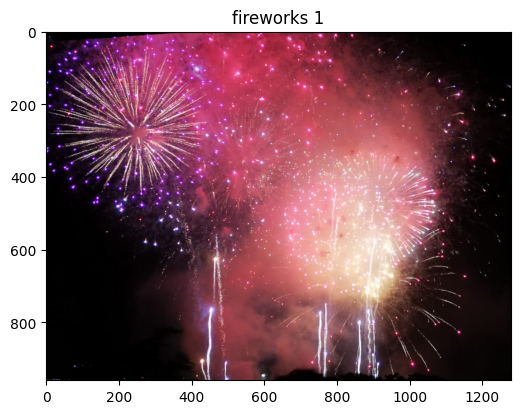

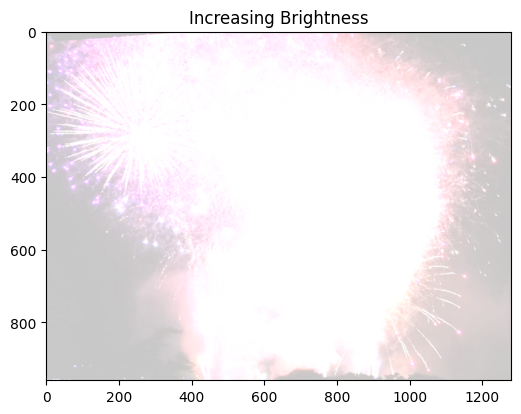

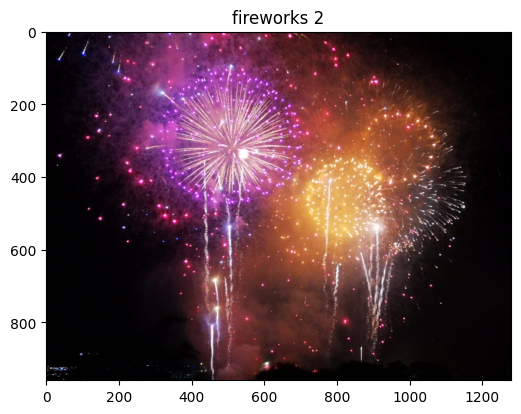

In [8]:
fireworks1 = cv2.imread('images/fireworks.jpeg')
fireworks2 = cv2.imread('images/fireworks2.jpeg')

M = np.ones(fireworks1.shape, dtype = "uint8") * 200
fireworks1b = cv2.add(fireworks1, M)

imshow("fireworks 1", fireworks1)
imshow("Increasing Brightness", fireworks1b)
imshow("fireworks 2", fireworks2)

In [9]:
def compare(image1, image2):
  image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
  image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
  print('MSE = {:.2f}'.format(mse(image1, image2)))
  print('SS = {:.2f}'.format(structural_similarity(image1, image2)))

In [10]:
# When they're the same
compare(fireworks1, fireworks1)

MSE = 0.00
SS = 1.00


In [11]:
compare(fireworks1, fireworks2)

MSE = 2125.41
SS = 0.48


In [12]:
compare(fireworks1, fireworks1b)

MSE = 28749.76
SS = 0.30


In [13]:
compare(fireworks2, fireworks1b)

MSE = 34332.79
SS = 0.18
